#**PROJET TITANIC**
# OBJECTIFS:
# - Determiner s'il y a plus d'hommes qui ont survécu que de femmes
# - Prédictions
# - Quelques statistiques concernant les différents passagers à bord

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic_train.csv to titanic_train.csv
User uploaded file "titanic_train.csv" with length 61194 bytes


# Importation des packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd

df = pd.read_csv('titanic_train.csv', index_col = 'PassengerId')

# Affichage des cinq premières lignes du jeu de données

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Les différentes modalités de la colonne 'Embarked'

In [4]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Toutes les colonnes du dataframe et leur type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Statistiques descriptives pour le DataFrame

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Le nombre de valeurs manquantes de chaque colonne

In [7]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Le pourcentage du nombre de valeur manquante dans chaque colonne

In [8]:
print('\n % de valeurs manquantes')
print(round((df.isna().sum()/df.shape[0])*100, 2))


 % de valeurs manquantes
Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64


# Transposé des statistiques du dataframe

In [9]:
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.0,1.0,1.0,2.0,3.0,3.0,3.0
Age,714.0,30.0,15.0,0.0,20.0,28.0,38.0,80.0
SibSp,891.0,1.0,1.0,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
Fare,891.0,32.0,50.0,0.0,8.0,14.0,31.0,512.0


# Vérification du nombre de doublons (lignes identiques)

In [10]:
df.duplicated().sum()

0

# Suppression des colonnes non utiles pour le machine learning

In [11]:
df = df.drop(['Ticket', 'Cabin', 'Name'], 1)

<ipython-input-11-0e7ffc10406a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Ticket', 'Cabin', 'Name'], 1)


# crétion d'une fonction pour encoder la variable catégorielle 'Embarked'

In [13]:
def replace_var_cat1(x):
    if x == 'S':
        return 0
    if x == 'Q':
        return 1
    if x == 'C':
        return 2

df['Embarked'] = df['Embarked'].apply(replace_var_cat1)

# crétion d'une fonction pour encoder la variable catégorielle 'Sex'


In [14]:
def replace_var_cat2(x):
    if x == 'male':
        return 0
    if x == 'female':
        return 1


df['Sex'] = df['Sex'].apply(replace_var_cat2)

# Remplacement des valeurs manquantes par la moyenne sur la colonne 'Age' et par 0 sur la colonne 'Embarked'
Pour la colonne 'Embarked', on pouvait remplacé l'unique valeur manquante par 1 ou 2 comme il n y a que 3 modalités. On peut aussi la remplacer par le mode (modalité dominante) qui est encore une fois le 0 d'après l'encodage effectué.

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(0)

# Séparation du dataframe en deux : jeu d'entrainement et jeu de test (20% du dataframe initial)

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived'], axis = 1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Importation et entrainement de 3 modèles sur le jeu d'entrainement.
# - Arbre de décision
# - Régression logistique
# - Random forest (Forêt aléatoire)

In [21]:
from sklearn.tree import DecisionTreeClassifier

zouloucable = DecisionTreeClassifier()

zouloucable.fit(X_train, y_train)



from sklearn.linear_model import LogisticRegression

zoul_2 = LogisticRegression()

zoul_2.fit(X_train, y_train)



from sklearn.ensemble import RandomForestClassifier

zoul_3 = RandomForestClassifier()

zoul_3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

# On a choisi le score comme métrique sur le jeu d'entrainement et de test pour les 3 différents modèles choisis.

In [22]:
print('Score sur ensemble train avec Decision tree', zouloucable.score(X_train, y_train))
print('Score sur ensemble test avec Decision tree', zouloucable.score(X_test, y_test))

print('Score sur ensemble train avec regression logistique', zoul_2.score(X_train, y_train))
print('Score sur ensemble test avec regression logistique', zoul_2.score(X_test, y_test))

print('Score sur ensemble train avec random forest', zoul_3.score(X_train, y_train))
print('Score sur ensemble test avec random forest', zoul_3.score(X_test, y_test))

Score sur ensemble train avec Decision tree 0.9845505617977528
Score sur ensemble test avec Decision tree 0.8044692737430168
Score sur ensemble train avec regression logistique 0.7963483146067416
Score sur ensemble test avec regression logistique 0.7988826815642458
Score sur ensemble train avec random forest 0.9845505617977528
Score sur ensemble test avec random forest 0.8100558659217877


# Les variables explicatives par ordre d'importance selon l'arbre de décision

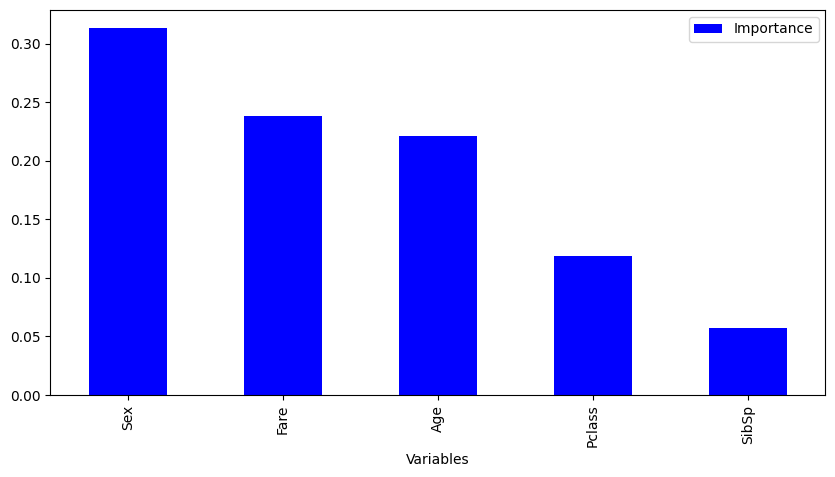

In [23]:
variables_importantes = pd.DataFrame({
    "Variables":
    X.columns,
    "Importance":
    zouloucable.feature_importances_
}).sort_values(by='Importance', ascending=False)


variables_importantes.nlargest(5, "Importance").plot.bar(x="Variables",
                                                    y="Importance",
                                                    figsize=(10, 5),
                                                    color="blue");


Les trois variables les plus explicatives sont : Sex, Age et Fare

# Les prédictions par rapport aux trois modèles choisis:

In [24]:


y_pred_decision_tree = zouloucable.predict(X_test)
y_pred_linear_regression = zoul_2.predict(X_test)
y_pred_random_forest = zoul_3.predict(X_test)

print("\nLes prédictions d'après le Decision Tree: \n", y_pred_decision_tree)
print("Les prédictions d'après la Régression Linéaire: \n", y_pred_linear_regression)
print("\nLes prédictions d'après le Random Forest: \n", y_pred_random_forest)


Les prédictions d'après le Decision Tree: 
 [0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0
 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1
 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1]
Les prédictions d'après la Régression Linéaire: 
 [0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0
 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1]

Les prédictions d'après le Random Forest: 
 [0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 

# Différence entre hommes et femmes qui ont embarqué dans ce bateau

<Axes: xlabel='Sex', ylabel='count'>

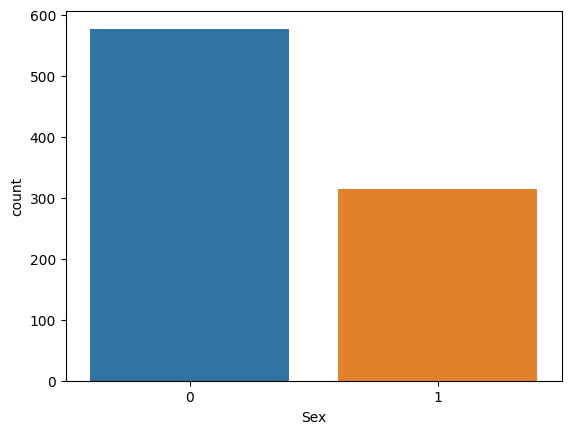

In [25]:
sns.countplot(x='Sex', data=df)

## On peut directement voir qu'il y a presque deux fois plus d'hommes que de femmes

In [51]:
df.sort_values(by = 'Age', ascending = True)
# L'individu le plus petit du bateau a 5 mois 12 jours

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Tranche d'âge
PassengerId,,,,,,,,,
804,1,3,0,0.42,0,1,8.5167,2.0,mineur
756,1,2,0,0.67,1,1,14.5000,0.0,mineur
645,1,3,1,0.75,2,1,19.2583,2.0,mineur
470,1,3,1,0.75,2,1,19.2583,2.0,mineur
832,1,2,0,0.83,1,1,18.7500,0.0,mineur
...,...,...,...,...,...,...,...,...,...
117,0,3,0,70.50,0,0,7.7500,1.0,vieu
97,0,1,0,71.00,0,0,34.6542,2.0,vieu
494,0,1,0,71.00,0,0,49.5042,2.0,vieu


In [52]:
df.sort_values(by = 'Age', ascending = False)
# L'individu le plus agé du bateau 80 ans

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Tranche d'âge
PassengerId,,,,,,,,,
631,1,1,0,80.00,0,0,30.0000,0.0,vieu
852,0,3,0,74.00,0,0,7.7750,0.0,vieu
97,0,1,0,71.00,0,0,34.6542,2.0,vieu
494,0,1,0,71.00,0,0,49.5042,2.0,vieu
117,0,3,0,70.50,0,0,7.7500,1.0,vieu
...,...,...,...,...,...,...,...,...,...
832,1,2,0,0.83,1,1,18.7500,0.0,mineur
470,1,3,1,0.75,2,1,19.2583,2.0,mineur
645,1,3,1,0.75,2,1,19.2583,2.0,mineur


In [53]:
def tranche_d_age (age):
  if age < 18 :
    return 'mineur'
  elif age >= 18 and age <= 60:
    return 'adulte'
  else:
    return 'vieu'

df["Tranche d'âge"] = df["Age"].apply(tranche_d_age)

<Axes: xlabel="Tranche d'âge", ylabel='count'>

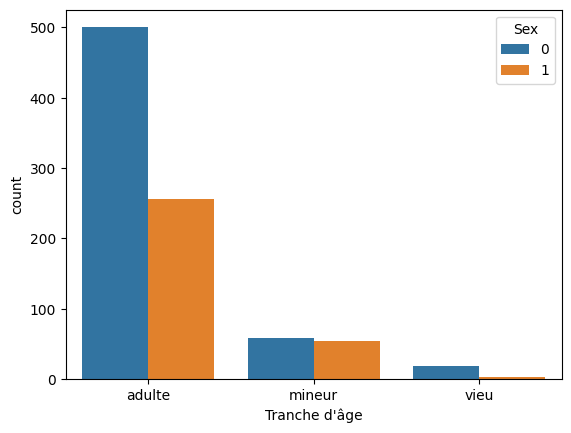

In [54]:
sns.countplot(x = "Tranche d'âge", hue = 'Sex', data = df);

<Axes: xlabel='Survived', ylabel='count'>

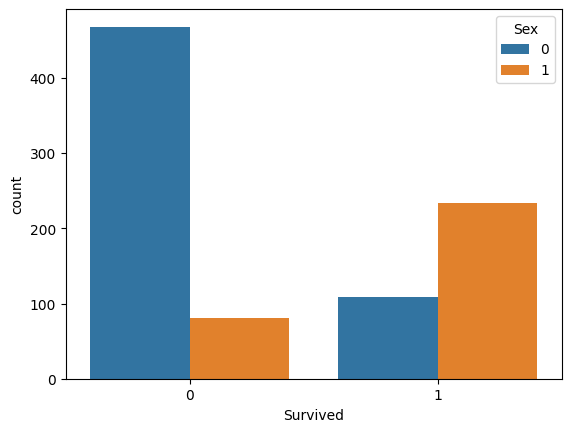

In [55]:
sns.countplot(x = "Survived", hue = 'Sex', data = df);

"On constate que près des 2/3 des survivants sont des femmes"
"Alors que le nombre d'hommes qui n'ont pas survécu est cinq fois plus grand que celui des femmes."

<Axes: xlabel='Survived', ylabel='count'>

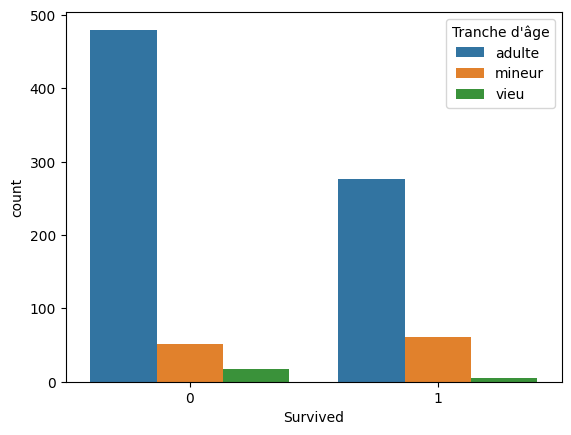

In [56]:
sns.countplot(x = "Survived", hue = "Tranche d'âge", data = df);

In [ ]:
titanic_by_ALIEN = df.to_csv('titanic_by_ALIEN.csv')